# Análise de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

# Carregar o dataset sujo gerado
df = pd.read_csv('transacoes_fraude_sujo.csv')

# Visualizar as primeiras linhas
print(df.head())

   id_transacao  tempo_desde_ultima_transacao     valor_transacao  \
0           522                         803.0  43.382570153645965   
1           738                         663.0   264.5710857695634   
2           741                        1268.0   572.2604773093935   
3           661                         855.0  125.39602394159856   
4           412                         688.0   745.9637770142415   

   localizacao_comerciante_risco  frequencia_cartao_dia  \
0                              0                      1   
1                              0                      1   
2                              0                     10   
3                              0                      5   
4                              1                      6   

   media_gasto_cartao_semana  fraude  
0                3249.863360       0  
1                2165.570679       0  
2                4935.006501       0  
3                2223.206183       0  
4                        NaN       

## Análise exploratória inicial

(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_transacao                   1000 non-null   int64  
 1   tempo_desde_ultima_transacao   950 non-null    float64
 2   valor_transacao                950 non-null    object 
 3   localizacao_comerciante_risco  1000 non-null   int64  
 4   frequencia_cartao_dia          1000 non-null   int64  
 5   media_gasto_cartao_semana      950 non-null    float64
 6   fraude                         1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB
None
       id_transacao  tempo_desde_ultima_transacao  \
count   1000.000000                    950.000000   
mean     500.500000                   1418.867368   
std      288.819436                   1197.941077   
min        1.000000                      1.000000   
25%      250

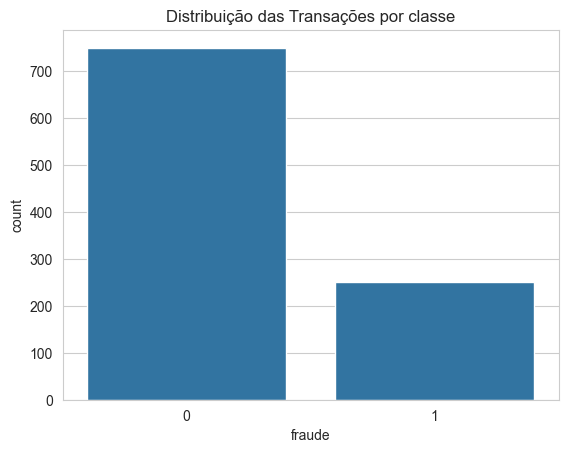

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())

sns.countplot(x='fraude', data=df)
plt.title('Distribuição das Transações por classe')
plt.show()

In [4]:
# Tentar forçar conversão para float e identificar erros
df['valor_transacao'] = pd.to_numeric(df['valor_transacao'], errors='coerce')


In [5]:
# Tentar forçar conversão para float e identificar erros
df['valor_transacao'] = pd.to_numeric(df['valor_transacao'], errors='coerce')


In [6]:
# Percentual de valores ausentes
df.isnull().mean().sort_values(ascending=False)


valor_transacao                  0.051
tempo_desde_ultima_transacao     0.050
media_gasto_cartao_semana        0.050
id_transacao                     0.000
localizacao_comerciante_risco    0.000
frequencia_cartao_dia            0.000
fraude                           0.000
dtype: float64

In [7]:
# Valores inválidos nas colunas categóricas
print("Frequência de 'localizacao_comerciante_risco':")
print(df['localizacao_comerciante_risco'].value_counts(dropna=False))

print("\nFrequência de 'frequencia_cartao_dia':")
print(df['frequencia_cartao_dia'].value_counts().sort_index())


Frequência de 'localizacao_comerciante_risco':
localizacao_comerciante_risco
0    742
1    257
2      1
Name: count, dtype: int64

Frequência de 'frequencia_cartao_dia':
frequencia_cartao_dia
-1      1
 1     60
 2     48
 3     71
 4     48
 5     53
 6     50
 7     43
 8     59
 9     52
 10    41
 11    55
 12    70
 13    67
 14    58
 15     5
 16    10
 17     9
 18     5
 19     6
 20     7
 21     8
 22     7
 23     7
 24     6
 25     6
 26     5
 27     7
 28     8
 29     2
 30     3
 31     8
 32     8
 33     5
 34     8
 35    11
 36     4
 37    10
 38     8
 39     8
 40     5
 41     5
 42     5
 43     4
 44     5
 45     4
 46     7
 47     9
 48     8
 49     1
Name: count, dtype: int64


# Tratamento dos Dados

In [8]:
# Substituir -1 por NaN (para posterior imputação)
df['frequencia_cartao_dia'] = df['frequencia_cartao_dia'].replace(-1, np.nan)

# Verificar estatísticas após a limpeza
print(df['frequencia_cartao_dia'].describe())


count    999.000000
mean      12.938939
std       11.568359
min        1.000000
25%        5.000000
50%       10.000000
75%       14.000000
max       49.000000
Name: frequencia_cartao_dia, dtype: float64


In [9]:
# Imputar valores ausentes com a mediana de cada coluna numérica
for col in ['tempo_desde_ultima_transacao', 'valor_transacao', 'media_gasto_cartao_semana', 'frequencia_cartao_dia']:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)


In [10]:
# Verificar se só há 0 e 1
print(df['localizacao_comerciante_risco'].value_counts())


localizacao_comerciante_risco
0    742
1    257
2      1
Name: count, dtype: int64


# Análise Exploratória dos Dados (EDA)

##  Distribuição das variáveis por classe (fraude)

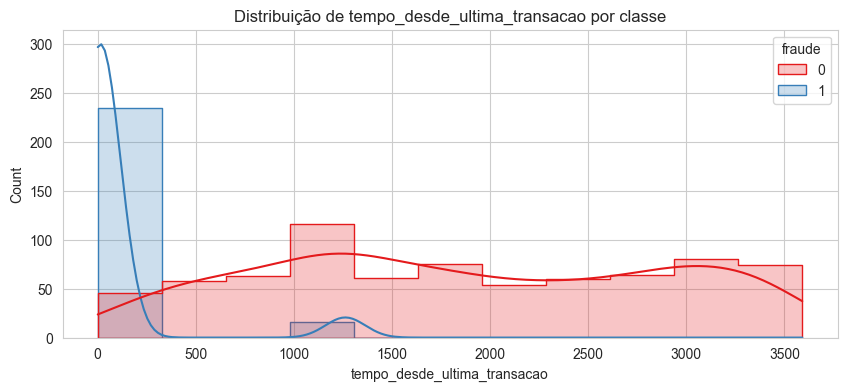

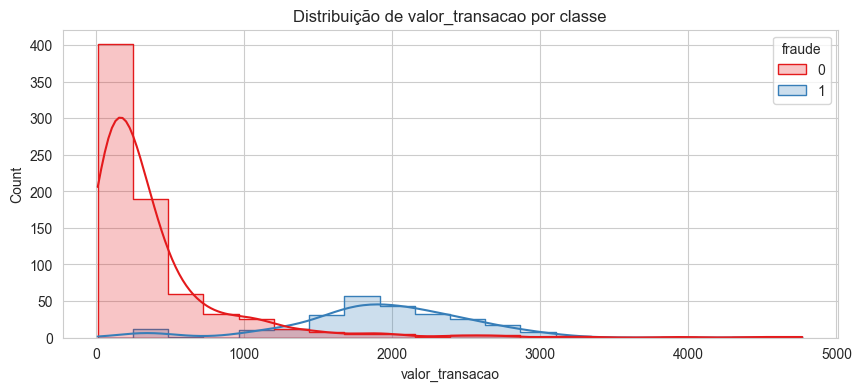

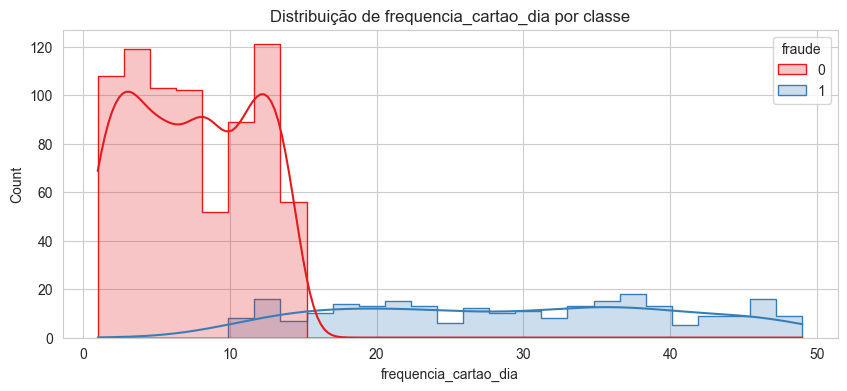

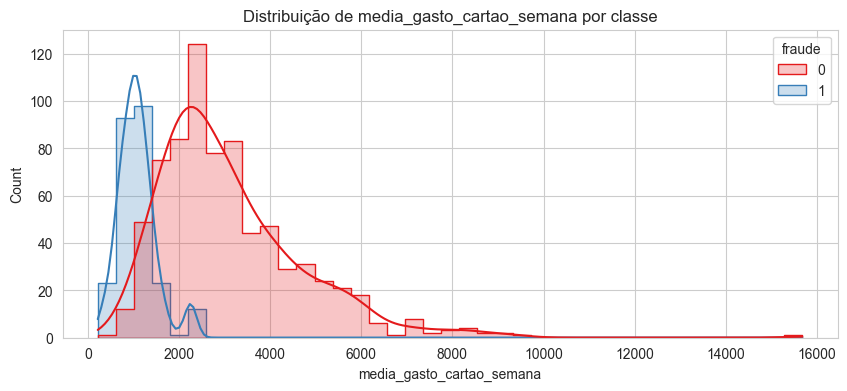

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas
variaveis_numericas = [
    'tempo_desde_ultima_transacao',
    'valor_transacao',
    'frequencia_cartao_dia',
    'media_gasto_cartao_semana'
]

# Plotar histogramas por classe
for var in variaveis_numericas:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=var, hue='fraude', kde=True, element="step", palette='Set1', common_norm=False)
    plt.title(f'Distribuição de {var} por classe')
    plt.show()


## Boxplots para detectar outliers por classe

/var/folders/tc/zmf47r390vncn8zlzbtg_myr0000gp/T/ipykernel_32780/3335560854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraude', y=var, palette='Set2')


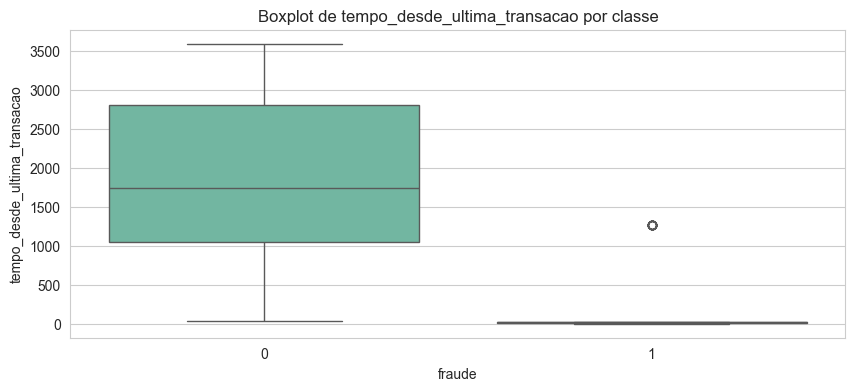

/var/folders/tc/zmf47r390vncn8zlzbtg_myr0000gp/T/ipykernel_32780/3335560854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraude', y=var, palette='Set2')


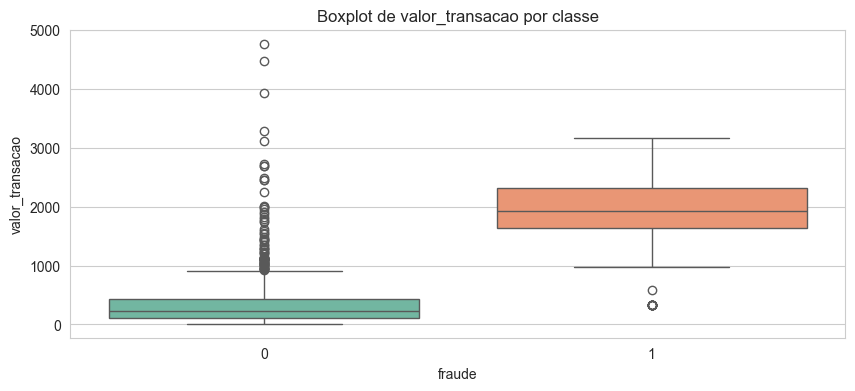

/var/folders/tc/zmf47r390vncn8zlzbtg_myr0000gp/T/ipykernel_32780/3335560854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraude', y=var, palette='Set2')


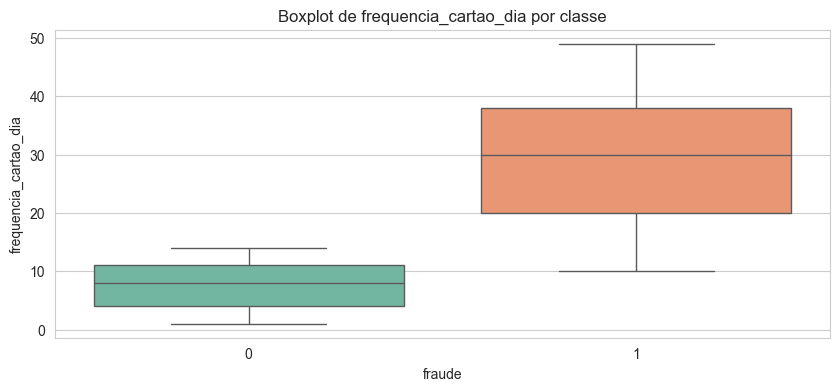

/var/folders/tc/zmf47r390vncn8zlzbtg_myr0000gp/T/ipykernel_32780/3335560854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraude', y=var, palette='Set2')


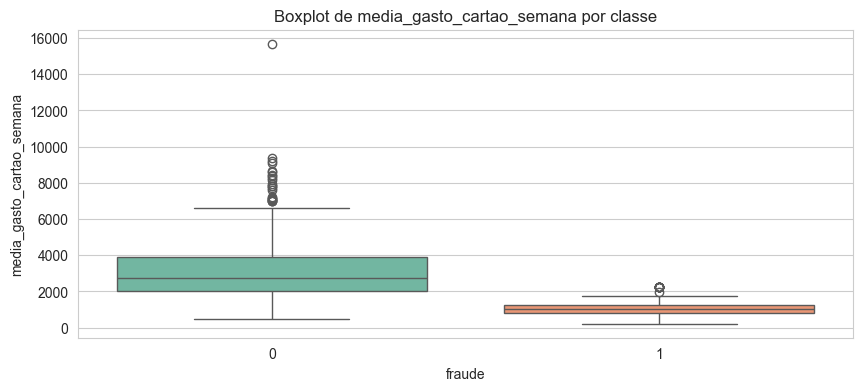

In [13]:
for var in variaveis_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='fraude', y=var, palette='Set2')
    plt.title(f'Boxplot de {var} por classe')
    plt.show()


## Matriz de Correlação (Pearson)

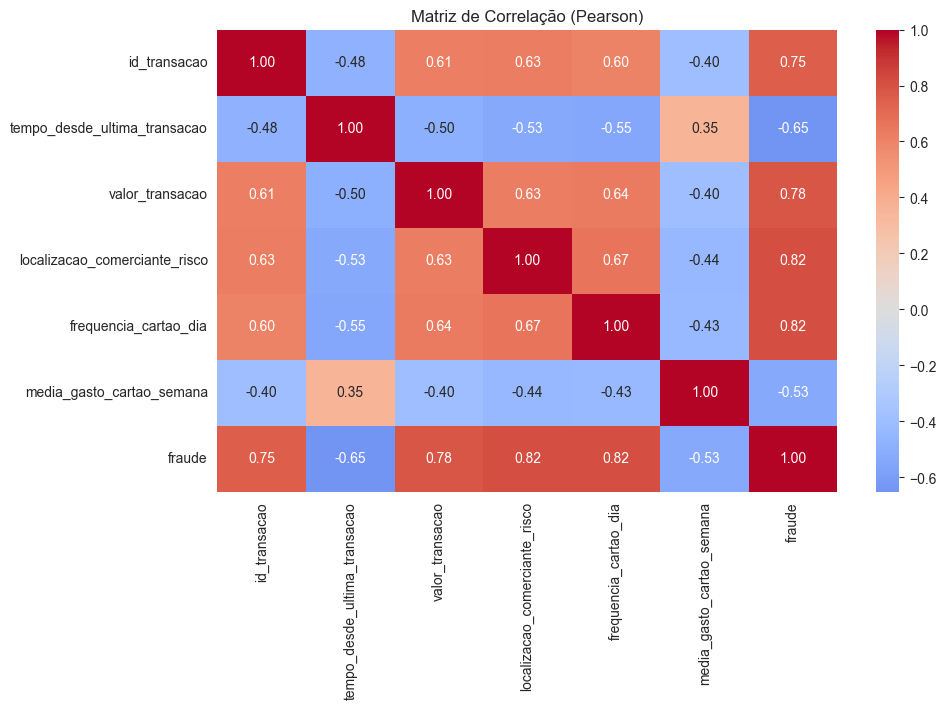

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Matriz de Correlação (Pearson)')
plt.show()


##  Distribuição da variável alvo (fraude)

/var/folders/tc/zmf47r390vncn8zlzbtg_myr0000gp/T/ipykernel_32780/3364059626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraude', palette='Set1')


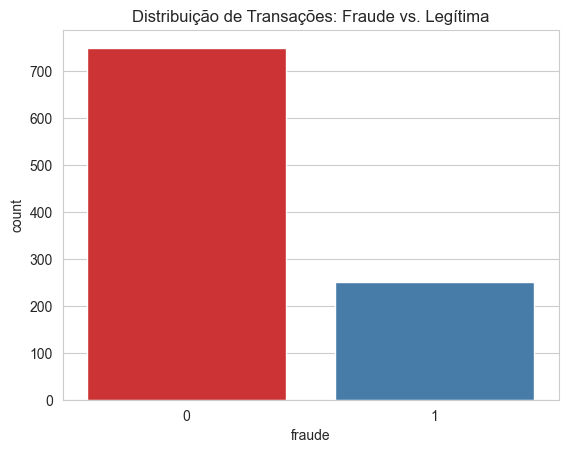

fraude
0    75.0
1    25.0
Name: proportion, dtype: float64


In [15]:
sns.countplot(data=df, x='fraude', palette='Set1')
plt.title('Distribuição de Transações: Fraude vs. Legítima')
plt.show()

print(df['fraude'].value_counts(normalize=True) * 100)


In [16]:
from sklearn.model_selection import train_test_split

# X: variáveis independentes, y: variável alvo
X = df.drop(columns=['fraude', 'id_transacao'])  # Se ainda não removido
y = df['fraude']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[225   0]
 [  0  75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



AUC: 1.000


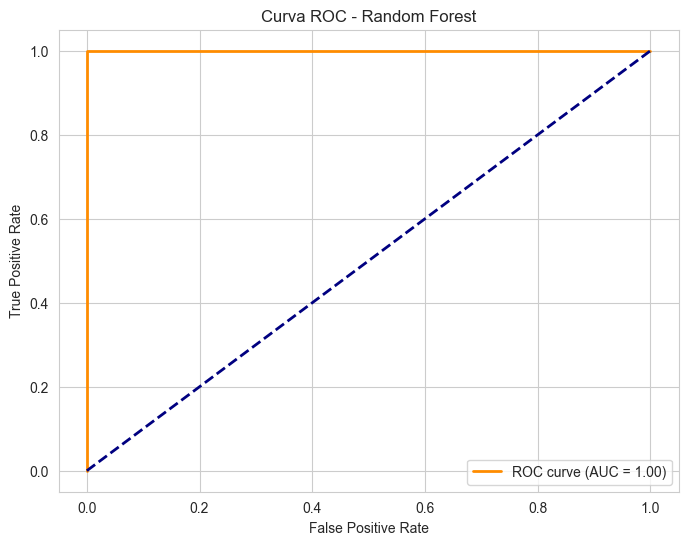

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades previstas para a classe positiva
y_probs = modelo.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc_score:.3f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Treinando o modelo
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Previsão
y_pred_log = log_model.predict(X_test)

# Matriz de confusão
print(confusion_matrix(y_test, y_pred_log))

# Relatório de classificação
print(classification_report(y_test, y_pred_log))


[[223   2]
 [  0  75]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       225
           1       0.97      1.00      0.99        75

    accuracy                           0.99       300
   macro avg       0.99      1.00      0.99       300
weighted avg       0.99      0.99      0.99       300



ROC-AUC: 0.9999


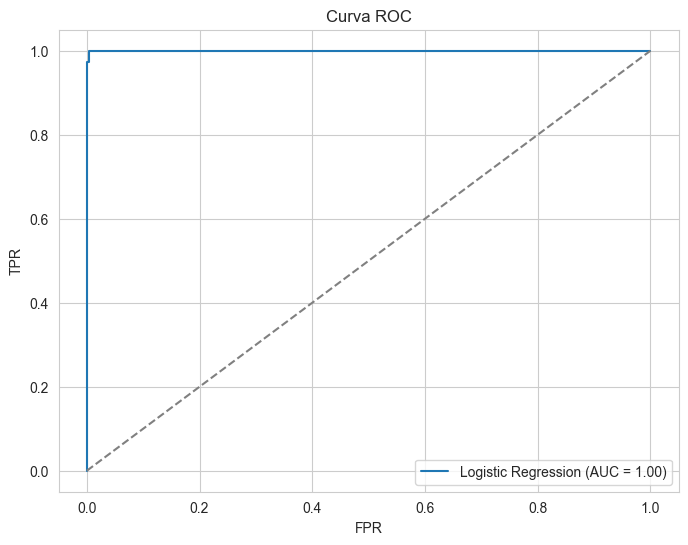

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades para classe positiva
y_proba_log = log_model.predict_proba(X_test)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_proba_log)
print(f"ROC-AUC: {auc:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()
